In [68]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

oversample = RandomOverSampler()
df= pd.read_csv('final_datasets/encoded_dataset.csv')
X = df.iloc[:, 3:].values
y = df.iloc[:, 2].values
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)


pca = PCA(n_components = 30)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



In [85]:
from sklearn import svm
svm_model = svm.SVC().fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
svm_score = accuracy_score(y_test, y_pred,normalize = True)
print(svm_score)
precision_recall_fscore_support(y_test, y_pred, average='macro')

0.8153846153846154


(0.8334777084777085, 0.8208057029177718, 0.8173688596223807, None)

In [86]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0, multi_class = "ovr").fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
lr_score = accuracy_score(y_test, y_pred,normalize = True)
print(lr_score)
precision_recall_fscore_support(y_test, y_pred, average='macro')

0.7230769230769231


(0.7218141233766233, 0.7226553618794997, 0.7177633267733379, None)

In [87]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
gnb_score = accuracy_score(y_test,y_pred,normalize=True)
print(gnb_score)
precision_recall_fscore_support(y_test, y_pred, average='macro')

0.6076923076923076


(0.7093552154404081, 0.6229916635089049, 0.6170508876762486, None)

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(max_depth=100, random_state=0).fit(X_train,y_train)
y_pred = rfc_model.predict(X_test)
rfc_score = accuracy_score(y_test,y_pred,normalize=True)
print(rfc_score)
precision_recall_fscore_support(y_test, y_pred, average='macro')

0.8846153846153846


(0.8848684210526316, 0.883582796513831, 0.882867366284814, None)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df= pd.read_csv('final_datasets/encoded_dataset.csv')
X = df.iloc[:, 3:].values
y = df.iloc[:, 2].values
col = df.columns[3:]
X_new = []
for data in X:
    datum = " ".join([col[i] for i in range(len(data)) if data[i] == 1])
    X_new.append(datum)
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(X_new)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
oversample = RandomOverSampler()
resumeDF = pd.read_csv('final_datasets/encoded_dataset.csv')
y = resumeDF.iloc[:, 2].values
X_over, y_over = oversample.fit_resample(df, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.2, random_state = 0)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
svm
0.8538461538461538
(0.8636204481792717, 0.863527851458886, 0.855511265306792, None)


In [ ]:
lr
0.823076923076923
(0.8430982905982907, 0.8347811671087533, 0.8273100289229323, None)

In [ ]:
rfc
0.8846153846153846
(0.8848684210526316, 0.883582796513831, 0.882867366284814, None)

In [ ]:
gnb
0.6076923076923076
(0.7093552154404081, 0.6229916635089049, 0.6170508876762486, None)

In [89]:
accuracy = [0.8538461538461538,0.823076923076923,0.8846153846153846,0.6076923076923076]
precision = [0.8636204481792717,0.8430982905982907,0.8848684210526316,0.7093552154404081]
recall = [0.863527851458886,0.8347811671087533,0.883582796513831,0.6229916635089049]
f1_score = [0.855511265306792,0.8273100289229323,0.882867366284814,0.6170508876762486]


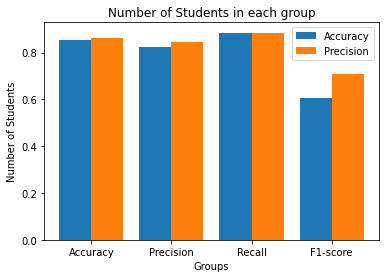

In [119]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Accuracy','Precision','Recall','F1-score']
x1 = [accuracy[0],precision[0]]
x2 = []
x3 = []
x4 = []
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

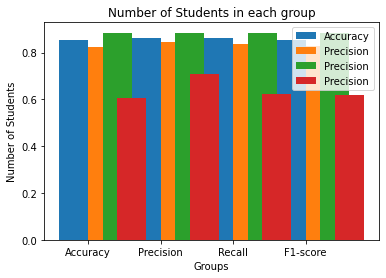

In [120]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Accuracy','Precision','Recall','F1-score']
x1 = [accuracy[0],precision[0],recall[0],f1_score[0]]
x2 = [accuracy[1],precision[1],recall[1],f1_score[1]]
x3 = [accuracy[2],precision[2],recall[2],f1_score[2]]
x4 = [accuracy[3],precision[3],recall[3],f1_score[3]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, x1, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, x2, 0.4, label = 'Precision')
plt.bar(X_axis + 0.4, x3, 0.4, label = 'Precision')
plt.bar(X_axis + 0.6, x4, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

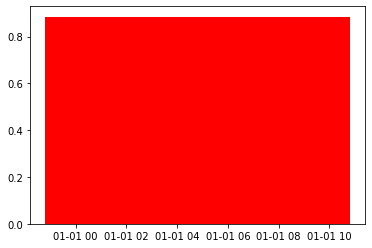

In [121]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)
ax.bar(x, x1, width=0.5, color='b', align='center')
ax.bar(x, x2, width=0.5, color='g', align='center')
ax.bar(x, x3, width=0.5, color='r', align='center')
ax.xaxis_date()

plt.show()


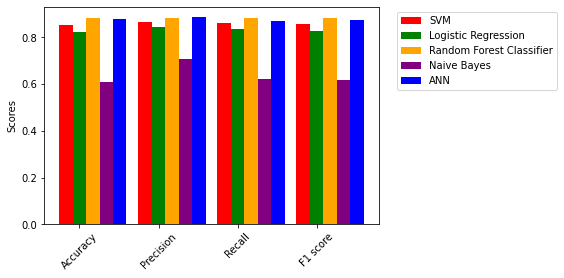

In [140]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.17       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
x1 = [accuracy[0],precision[0],recall[0],f1_score[0]]
x2 = [accuracy[1],precision[1],recall[1],f1_score[1]]
x3 = [accuracy[2],precision[2],recall[2],f1_score[2]]
x4 = [accuracy[3],precision[3],recall[3],f1_score[3]]
x5 = [0.8769230769230769 , 0.8858057317359643, 0.8714625428335105, 0.8742778574844572]



rects1 = ax.bar(ind, x1, width, color='red')
rects2 = ax.bar(ind+width, x2, width, color='green')
rects3 = ax.bar(ind+width*2, x3, width, color='orange')
rects4 = ax.bar(ind+width*3, x4, width, color='purple')
rects5 = ax.bar(ind+width*4, x5, width, color='blue')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Accuracy', 'Precision', 'Recall',"F1 score"),rotation = 45)
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0],rects5[0]), ('SVM', 'Logistic Regression', 'Random Forest Classifier','Naive Bayes',"ANN"),bbox_to_anchor=(1.04,1))

plt.show()